SVD in NumPy

In [1]:
import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


Truncated SVD in scikit-learn

In [2]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-0.28612925  2.21768574]
 [ 2.77567459 -0.54371919]
 [-1.10170804 -1.94582615]]


Randomized SVD in scikit-learn

In [3]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Left Singular Vectors:
[[-0.37975408 -0.6413598 ]
 [-0.61773013  0.71224882]
 [ 0.68861915  0.28523539]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[-0.28523539 -0.71224882  0.6413598 ]
 [ 0.68861915 -0.61773013 -0.37975408]]


SVD for Spectral Clustering

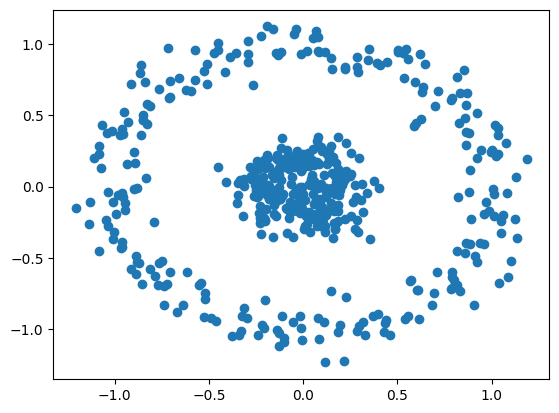

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


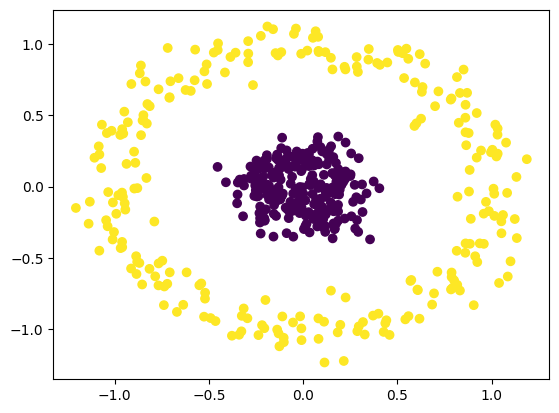

In [4]:
# import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

SVD for Image Compression

(638, 638) (638,) (960, 960)


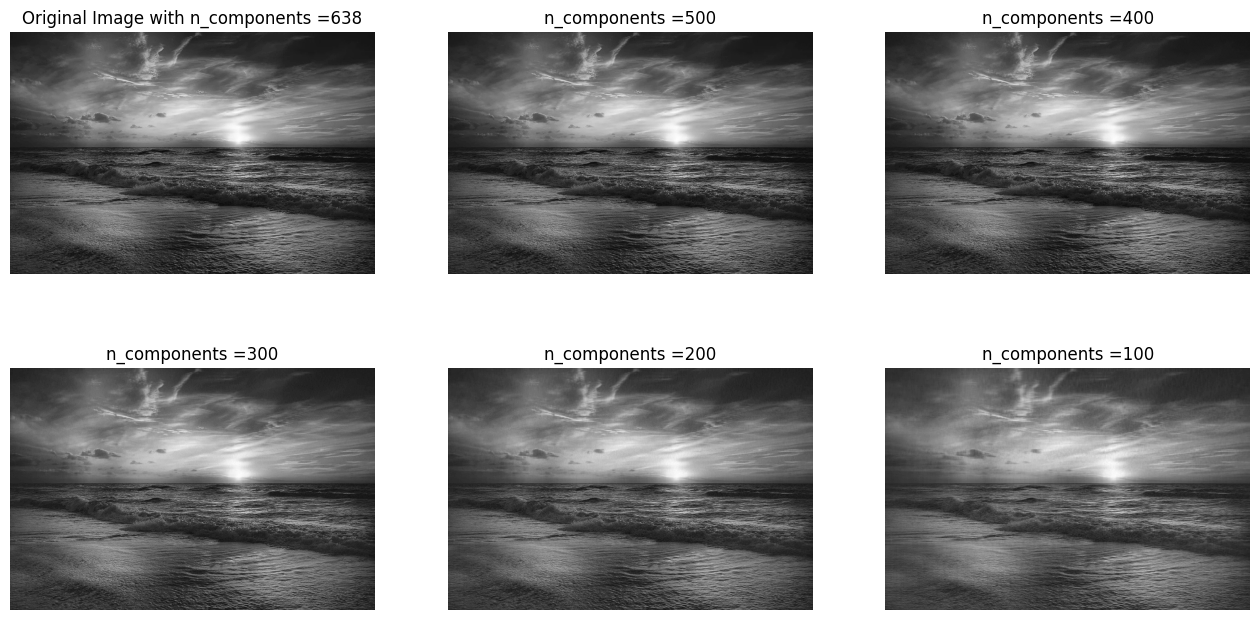

In [7]:
# import the necessary packages

# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import cv2

# read image in grayscale
img = cv2.imread('download.jpeg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

Rank estimation

In [8]:
import numpy as np

# Example matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Perform SVD
U, s, VT = np.linalg.svd(matrix)

# Calculate the rank estimation
tolerance = np.max(matrix.shape) * np.finfo(s.dtype).eps  # Machine epsilon
rank = np.sum(s > tolerance)

print("Estimated rank:", rank)


Estimated rank: 2


In [10]:
import numpy as np

# Example matrix
matrix = np.array([[0, 8, 7], [6, 5, 4], [3, 2, 1]])

# Perform SVD
U, s, VT = np.linalg.svd(matrix)

# Calculate the rank estimation
tolerance = np.max(matrix.shape) * np.finfo(s.dtype).eps  # Machine epsilon
rank = np.sum(s > tolerance)

print("Estimated rank:", rank)


Estimated rank: 3


Dimensionality reduction

In [11]:
import numpy as np

# Example dataset
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Perform SVD
U, s, VT = np.linalg.svd(data)

# Set the number of dimensions to keep
k = 2

# Construct the reduced-dimensional representation
reduced_data = np.dot(U[:, :k], np.diag(s[:k]))

print("Original data shape:", data.shape)
print("Reduced data shape:", reduced_data.shape)
print("Reduced data:")
print(reduced_data)


Original data shape: (4, 3)
Reduced data shape: (4, 2)
Reduced data:
[[ -3.58705934  -1.06442721]
 [ -8.75770068  -0.55016253]
 [-13.92834202  -0.03589786]
 [-19.09898335   0.47836682]]


Low-rank approximation

In [30]:
import numpy as np

# Example matrix
matrix = np.array([[9, 9, 9], [8, 8, 8], [7, 8, 9], [10, 11, 12]])

# Perform SVD
U, s, VT = np.linalg.svd(matrix)

# Set the desired rank for approximation
k = 1

# Construct the low-rank approximation
approximation = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]

print("Original matrix:")
print(matrix)
print("\nLow-rank approximation:")
print(approximation)


Original matrix:
[[ 9  9  9]
 [ 8  8  8]
 [ 7  8  9]
 [10 11 12]]

Low-rank approximation:
[[ 8.46210049  8.98008152  9.49806255]
 [ 7.52186711  7.98229469  8.44272227]
 [ 7.55802291  8.02066365  8.4833044 ]
 [10.37872307 11.01402416 11.64932524]]


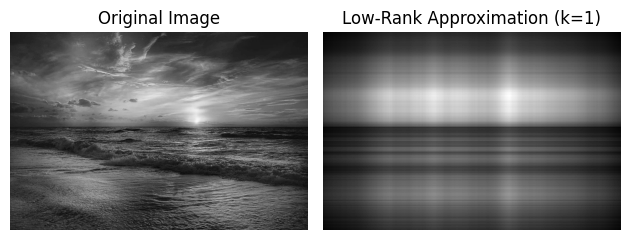

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('download.jpeg')

# Convert the image to grayscale if needed
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# Perform SVD
U, s, VT = np.linalg.svd(image)

# Set the desired rank for approximation
k = 1

# Construct the low-rank approximation
approximation = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]

# Display the original image and the low-rank approximation
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(approximation, cmap='gray')
plt.title(f'Low-Rank Approximation (k={k})')
plt.axis('off')

plt.tight_layout()
plt.show()


In [36]:
import numpy as np


A = np.random.randint(1,100, [50,30])
U,S,V_t = np.linalg.svd(A)
print()
print(U.shape)   # (50 ,50)
print(S.shape)   # (30,)
print(V_t.shape) # (30, 30)
# construct S for full dimension
z = np.zeros((20,30))
S = np.concatenate((np.diag(S), z))

A_compose = np.matmul(U, np.matmul(S,V_t))  # SVD formula: A=U*S*V'

print()
print(np.allclose(A, A_compose))  # compare the composed matrix


(50, 50)
(30,)
(30, 30)

True


In [37]:
import numpy as np

# create a random numpy array
A = np.random.randint(1,100, [50,30])
U,S,V_t = np.linalg.svd(A, full_matrices=False)
print()
print(U.shape)   # (50 ,30)
print(S.shape)   # (30,)
print(V_t.shape) # (30, 30)


(50, 30)
(30,)
(30, 30)


In [38]:
import numpy as np
from scipy.sparse.linalg import svds

# create a random numpy array
A = np.random.randint(1,100, [30,20])
#convert to the type float
A = A.astype(np.float)     
U,S,V_T = svds(A, k=5)

print(U.shape)     # (30, 6)
print(S.shape)     # (6,)
print(V_T.shape)   # (6, 20)

(30, 5)
(5,)
(5, 20)


<ipython-input-38-34538c63a245>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A = A.astype(np.float)
